In [2]:
from Data import *
import os

# os.chdir('report')

c:\Users\Lanceiv\Documents\GEMS\Data.py:213: SyntaxWarning: invalid escape sequence '\d'
  title += f", Fit degrees: {polyfit}, Minimum: {self.minTI:.2f}, $\delta$ = {416 - self.minTI:.2f}"


In [3]:
m, n, h = 1000, 1000, 1
TIs = sorted(list(range(208, 1000, 16)))
data = Data(
    TIs = TIs,
    n_iters = m,
    sample_size = n,
    SNR = 10000,
    nullpts = [416, 832],
    thresh = h,
    normalize_each_TI = True
)
data.generate_all()
# data.load_data("data_ripser.npy")
# data.save_acr("acr_ripped.npy")

100%|██████████| 50/50 [25:30<00:00, 30.60s/it]


In [4]:
# m, n, h = 10000, 1, 1
# TIs = sorted(list(range(208, 1000, 16)))
# data2 = Data(
#     TIs = TIs,
#     n_iters = m,
#     sample_size = n,
#     SNR = 10000,
#     nullpts = [416, 832],
#     thresh = h,
#     normalize_each_TI = True
# )
# data2.generate_all()
# data2.save_acr("acr_ripped2.npy")

In [5]:
# data2.plot_acr()

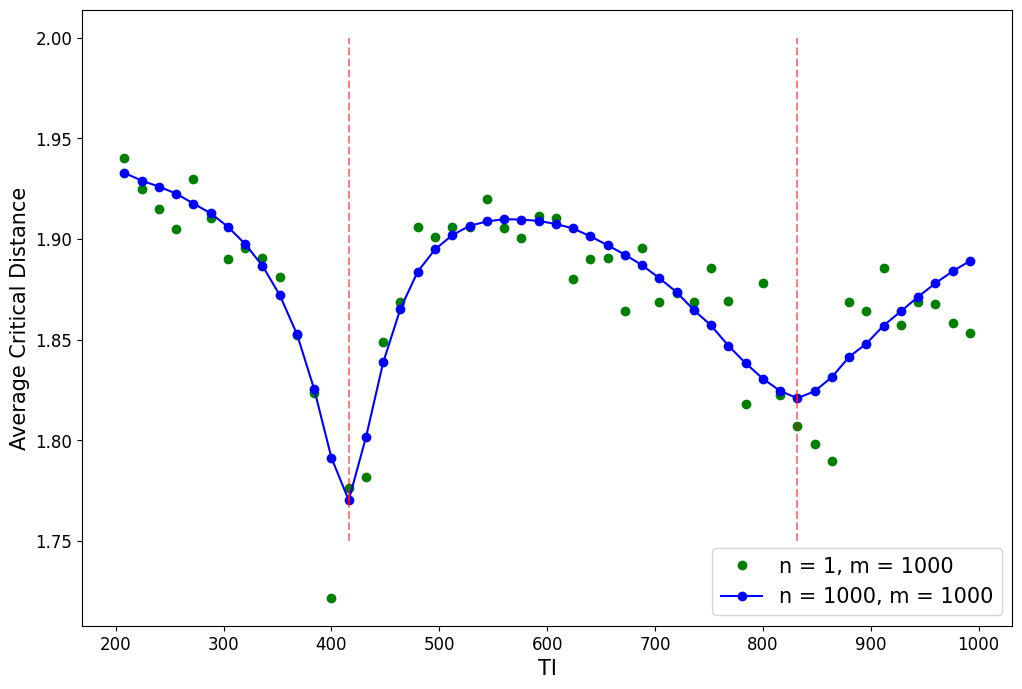

In [7]:
plt.xlabel("TI", fontsize = 15)
plt.ylabel("Average Critical Distance", fontsize = 15)

# n = 1
chosen_index = 2
chosen_data = data.ripped[:,chosen_index]
plt.plot(data.TIs, chosen_data, 'o', color = "green", label = "n = 1, m = 1000")

# chosen_data = data2.ripped[:,0]
# plt.plot(data.TIs, chosen_data, 'o', color = "purple", label = "n = 1, m = 10000")

# n = 1000
plt.plot(data.TIs, data.acr_mean, '-o', color = 'blue', label = "n = 1000, m = 1000")
for i in data.nullpts:
    if i in data.TIs:
        plt.errorbar(i, data.acr_mean[data.TIs.index(i)], yerr = data.acr_std[data.TIs.index(i)], color = "red")
        plt.plot([i, i], [1.75, 2], '--', color = "red", alpha = 0.5)

plt.gcf().set_size_inches(12, 8)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize = 15)


# plt.savefig("acr.png")